<a href="https://colab.research.google.com/github/Kavya2905/Handwritten-Digit-Prediction/blob/main/MNIST_Hand_Written_Digit_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Importing libraries

import tensorflow.keras as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain[700]

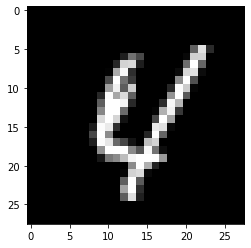

In [ ]:
plt.imshow(xtrain[700], cmap='gray')
plt.show()

In [ ]:
ytrain[700]

4

In [ ]:
### Neural Network

In [ ]:
model = tf.models.Sequential()
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(784, activation="relu"))
model.add(tf.layers.Dense(10, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
### Scale the data
xtrain = xtrain/255.0
xtest = xtest/255

In [ ]:

### Train the model
model.fit(xtrain, ytrain,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1894 - accuracy: 0.9437
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0757 - accuracy: 0.9762
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0499 - accuracy: 0.9835
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0339 - accuracy: 0.9890
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0266 - accuracy: 0.9913
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0206 - accuracy: 0.9930
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0177 - accuracy: 0.9943
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0128 - accuracy: 0.9958
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.013

In [ ]:
ypred = model.predict(xtest)

In [ ]:
ytest[520]

8

In [ ]:
ypred[520]

array([4.5357810e-15, 3.5580542e-13, 1.0258777e-12, 3.3119327e-09,
       2.2693479e-11, 2.4915403e-11, 7.7878527e-14, 9.9039158e-16,
       1.0000000e+00, 8.5452484e-13], dtype=float32)

In [ ]:
ypred[520].argmax()

8

In [ ]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1401 - accuracy: 0.9748


[0.14008890092372894, 0.9747999906539917]

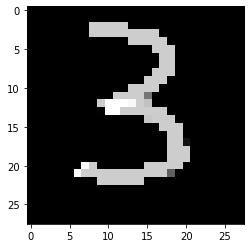

In [ ]:
### Digit recognition using an image as input 

import cv2
img = cv2.imread("3.png",0)
img = cv2.bitwise_not(img)
img = cv2.resize(img,(28,28))
img = img/255
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
img.shape

(28, 28)

In [ ]:
import numpy as np
model.predict(np.array([[img]]))

array([[3.6424177e-24, 1.0599072e-16, 9.6101740e-13, 1.0000000e+00,
        6.4937180e-21, 3.3450385e-14, 8.4678347e-18, 1.3198829e-21,
        7.0659173e-10, 1.5579203e-15]], dtype=float32)

In [ ]:
model.predict(np.array([[img]])).argmax()

3